In [2]:
#!/usr/bin/env python3
# !conda install requests
# !pip install fmpsdk
# !pip install requests

import os
import typing

from dotenv import load_dotenv

import fmpsdk

import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
# Actual API key is stored in a .env file.  Not good to store API key directly in script.
load_dotenv()
apikey = os.environ.get("apikey")


In [4]:
# Company Valuation Methods
symbol: str = "AAPL"
symbols: typing.List[str] = ["AAPL", "GOOG","CSCO", "DKS", "HD"]
exchange: str = "NYSE"
exchanges: typing.List[str] = ["NYSE", "NASDAQ"]
query: str = "AA"
limit: int = 3
period: str = "quarter"
download: bool = True
market_cap_more_than: int = 1000000000
beta_more_than: int = 1
volume_more_than: int = 10000
sector: str = "Technology"
dividend_more_than: int = 0
industry: str = "Software"
filing_type: str = "10-K"

In [4]:
print(f"Company Profile: {fmpsdk.company_profile(apikey=apikey, symbol=symbol)=}")

Company Profile: fmpsdk.company_profile(apikey=apikey, symbol=symbol)=[{'symbol': 'AAPL', 'price': 141.36, 'beta': 1.222222, 'volAvg': 81839761, 'mktCap': 2336709148672, 'lastDiv': 0.85, 'range': '107.32-157.26', 'changes': 0.25, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'http://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support servic

In [5]:
fmpsdk.quote(apikey=apikey, symbol=symbol)

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 141.36,
  'changesPercentage': 0.17716675,
  'change': 0.25,
  'dayLow': 138.37,
  'dayHigh': 141.65,
  'yearHigh': 157.26,
  'yearLow': 107.32,
  'marketCap': 2336709148672.0,
  'priceAvg50': 147.93,
  'priceAvg200': 137.53094,
  'volume': 67241840,
  'avgVolume': 81839761,
  'exchange': 'NASDAQ',
  'open': 139.47,
  'previousClose': 141.11,
  'eps': 5.108,
  'pe': 27.674238,
  'earningsAnnouncement': '2021-07-27T16:30:00.000+0000',
  'sharesOutstanding': 16530200542,
  'timestamp': 1633547827}]

In [5]:
df_income = []
for symbol in symbols:
    df_income = df_income + fmpsdk.income_statement(apikey=apikey, symbol=symbol)

df_income = pd.DataFrame(df_income)

df_income['date']= pd.to_datetime(df_income['date'])
df_income.set_index(['symbol','date'],inplace=True)
df_income.sort_values(by=['symbol','date'],inplace=True)

df_income.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [6]:
df_balance = []
for symbol in symbols:
    df_balance = df_balance + fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)

df_balance = pd.DataFrame(df_balance)

df_balance['date']= pd.to_datetime(df_balance['date'])
df_balance.set_index(['symbol','date'],inplace=True)
df_balance.sort_values(by=['symbol','date'],inplace=True)

df_balance.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockhol

In [7]:
df_cashflow = []
for symbol in symbols:
    df_cashflow = df_cashflow + fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol)

df_cashflow = pd.DataFrame(df_cashflow)

df_cashflow['date']= pd.to_datetime(df_cashflow['date'])
df_cashflow.set_index(['symbol','date'],inplace=True)
df_cashflow.sort_values(by=['symbol','date'],inplace=True)

df_cashflow.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')

In [8]:
df_keymetrics = []
for symbol in symbols:
    df_keymetrics = df_keymetrics + fmpsdk.key_metrics(apikey=apikey, symbol=symbol)

df_keymetrics = pd.DataFrame(df_keymetrics)

df_keymetrics['date']= pd.to_datetime(df_keymetrics['date'])
df_keymetrics.set_index(['symbol','date'],inplace=True)
df_keymetrics.sort_values(by=['symbol','date'],inplace=True)
df_keymetrics.columns

Index(['period', 'revenuePerShare', 'netIncomePerShare',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare',
       'bookValuePerShare', 'tangibleBookValuePerShare',
       'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap',
       'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio',
       'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
       'enterpriseValueOverEBITDA', 'evToOperatingCashFlow',
       'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield',
       'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio',
       'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
       'salesGeneralAndAdministrativeToRevenue',
       'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets',
       'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation',
       'stockBasedCompensationToRevenue', 'grahamNumber', 'roic',
       'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital',
   

In [9]:
moat_columns = ["EV+Div","Earnings","Sales","Cash"]
df_moat_perShare = pd.DataFrame(index=df_balance.index,columns=moat_columns)
df_moat_perShare["Sales"]=df_income['revenue']/df_income['weightedAverageShsOutDil']
df_moat_perShare["Earnings"]=df_income['netIncome']/df_income['weightedAverageShsOutDil']
df_moat_perShare["EV+Div"]=(df_balance['totalStockholdersEquity']+df_cashflow['dividendsPaid'].fillna(0))/df_income['weightedAverageShsOutDil']
df_moat_perShare["Cash"]=(df_cashflow['operatingCashFlow'])/df_income['weightedAverageShsOutDil']
df_moat_perShare.sort_values(by=['symbol','date'],inplace=True)
df_moat_perShare

EV+Div   Earnings       Sales       Cash
symbol date                                                    
AAPL   2011-09-24    2.921331   0.988406    4.127536   1.430981
       2012-09-29    4.371827   1.576619    5.912669   1.921274
       2013-09-28    4.331161   1.419775    6.551656   2.057230
       2014-09-27    4.100381   1.613269    7.463868   2.438196
       2015-09-26    4.651852   2.304219   10.085975   3.507036
       2016-09-24    5.276958   2.076576    9.801272   3.010346
       2017-09-30    5.773282   2.301687   10.912388   3.027500
       2018-09-29    4.671648   2.976485   13.279461   3.871616
       2019-09-28    4.106820   2.971447   13.991120   3.731571
       2020-09-26    2.924314   3.275348   15.661322   4.602523
CSCO   2017-07-29   12.007526   1.903149    9.507823   2.748267
       2018-07-28    7.628765   0.022536   10.106536   2.799836
       2019-07-27    6.196272   2.609701   11.655962   3.555131
       2020-07-25    7.520981   2.643564   11.622112   3.636492
       2021-07-31    8.288952   2.500236   11.760623   3.648253
DKS    2017-01-28   16.588695   2.561096   70.595824   6.763590
       2018-02-03   17.366590   3.006386   79.847489   6.936869
       2019-02-02   18.372845   3.238113   85.406809   7.215507
       2020-02-01   18.337929   3.339793   98.250095   4.542833
       2021-01-30   24.094928   5.723842  103.455553  16.761504
GOOG   2016-12-31  198.990706  27.877247  129.198833  51.575341
       2017-12-31  216.750239  17.996430  157.557591  52.717231
       2018-12-31  252.569015  43.703477  194.542753  68.209901
       2019-12-31  290.874670  49.590000  233.715419  78.724829
       2020-12-31  326.888614  59.150000  268.108770  95.658810
HD     2017-01-29    0.752836   6.448136   76.657212   7.927877
       2018-01-28   -2.329392   7.288851   85.222973  10.161318
       2019-02-03   -5.758530   9.729659   94.665792  11.406824
       2020-02-02   -8.425255  10.438254  102.344475  12.741876
       2021-01-31   -2.923933  11.935065  122.551020  17.475881

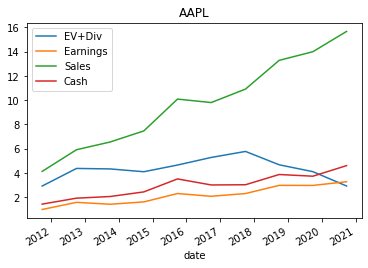

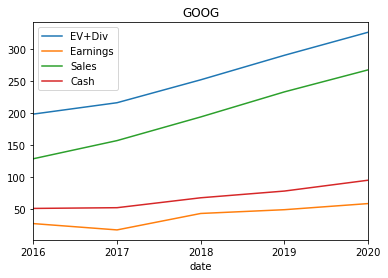

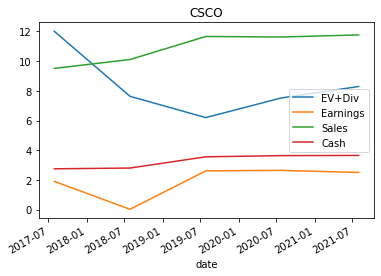

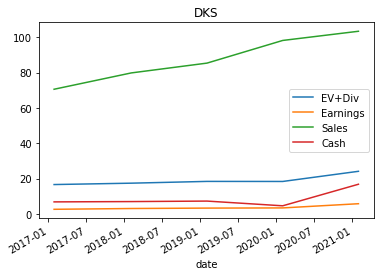

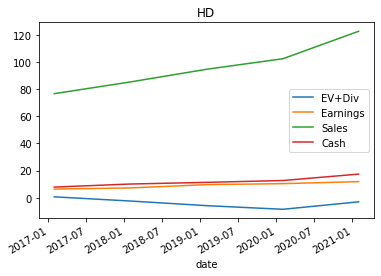

In [10]:
for symbol in symbols:
    df_moat_perShare.loc[symbol].plot(title=symbol)

In [11]:
df_moat_pct_chg = df_moat_perShare.copy()
df_moat_pct_chg = df_moat_pct_chg.groupby('symbol').pct_change()
df_moat_pct_chg

EV+Div    Earnings     Sales      Cash
symbol date                                                
AAPL   2011-09-24       NaN         NaN       NaN       NaN
       2012-09-29  0.496519    0.595112  0.432494  0.342627
       2013-09-28 -0.009302   -0.099481  0.108071  0.070764
       2014-09-27 -0.053284    0.136285  0.139234  0.185184
       2015-09-26  0.134493    0.428292  0.351307  0.438373
       2016-09-24  0.134378   -0.098794 -0.028228 -0.141627
       2017-09-30  0.094055    0.108405  0.113364  0.005698
       2018-09-29 -0.190816    0.293176  0.216916  0.278816
       2019-09-28 -0.120905   -0.001693  0.053591 -0.036172
       2020-09-26 -0.287937    0.102274  0.119376  0.233401
CSCO   2017-07-29       NaN         NaN       NaN       NaN
       2018-07-28 -0.364668   -0.988158  0.062970  0.018764
       2019-07-27 -0.187775  114.799565  0.153309  0.269764
       2020-07-25  0.213791    0.012976 -0.002904  0.022885
       2021-07-31  0.102111   -0.054218  0.011918  0.003234
DKS    2017-01-28       NaN         NaN       NaN       NaN
       2018-02-03  0.046893    0.173867  0.131051  0.025619
       2019-02-02  0.057942    0.077078  0.069624  0.040168
       2020-02-01 -0.001900    0.031401  0.150378 -0.370407
       2021-01-30  0.313939    0.713831  0.052982  2.689659
GOOG   2016-12-31       NaN         NaN       NaN       NaN
       2017-12-31  0.089248   -0.354440  0.219497  0.022140
       2018-12-31  0.165254    1.428453  0.234741  0.293882
       2019-12-31  0.151664    0.134692  0.201358  0.154155
       2020-12-31  0.123813    0.192781  0.147159  0.215103
HD     2017-01-29       NaN         NaN       NaN       NaN
       2018-01-28 -4.094155    0.130381  0.111741  0.281720
       2019-02-03  1.472117    0.334869  0.110801  0.122573
       2020-02-02  0.463091    0.072828  0.081114  0.117040
       2021-01-31 -0.652956    0.143397  0.197437  0.371531

In [20]:
df_moat_rolling5_pct_chg = df_moat_pct_chg.groupby('symbol').rolling(5,min_periods=1).median().reset_index(0,drop=True)
df_moat_rolling5_pct_chg['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg.median(axis=1)
df_moat_rolling5_pct_chg

EV+Div   Earnings     Sales      Cash  \
symbol date                                                  
AAPL   2011-09-24       NaN        NaN       NaN       NaN   
       2012-09-29  0.496519   0.595112  0.432494  0.342627   
       2013-09-28  0.243609   0.247815  0.270282  0.206695   
       2014-09-27 -0.009302   0.136285  0.139234  0.185184   
       2015-09-26  0.062595   0.282289  0.245270  0.263905   
       2016-09-24  0.134378   0.136285  0.139234  0.185184   
       2017-09-30  0.094055   0.108405  0.113364  0.070764   
       2018-09-29  0.094055   0.136285  0.139234  0.185184   
       2019-09-28  0.094055   0.108405  0.113364  0.005698   
       2020-09-26 -0.120905   0.102274  0.113364  0.005698   
CSCO   2017-07-29       NaN        NaN       NaN       NaN   
       2018-07-28 -0.364668  -0.988158  0.062970  0.018764   
       2019-07-27 -0.276222  56.905703  0.108140  0.144264   
       2020-07-25 -0.187775   0.012976  0.062970  0.022885   
       2021-07-31 -0.042832  -0.020621  0.037444  0.020825   
DKS    2017-01-28       NaN        NaN       NaN       NaN   
       2018-02-03  0.046893   0.173867  0.131051  0.025619   
       2019-02-02  0.052418   0.125472  0.100338  0.032894   
       2020-02-01  0.046893   0.077078  0.131051  0.025619   
       2021-01-30  0.052418   0.125472  0.100338  0.032894   
GOOG   2016-12-31       NaN        NaN       NaN       NaN   
       2017-12-31  0.089248  -0.354440  0.219497  0.022140   
       2018-12-31  0.127251   0.537006  0.227119  0.158011   
       2019-12-31  0.151664   0.134692  0.219497  0.154155   
       2020-12-31  0.137738   0.163737  0.210427  0.184629   
HD     2017-01-29       NaN        NaN       NaN       NaN   
       2018-01-28 -4.094155   0.130381  0.111741  0.281720   
       2019-02-03 -1.311019   0.232625  0.111271  0.202147   
       2020-02-02  0.463091   0.130381  0.110801  0.122573   
       2021-01-31 -0.094932   0.136889  0.111271  0.202147   

                   Windage_Growth_Rate  
symbol date                             
AAPL   2011-09-24                  NaN  
       2012-09-29             0.464506  
       2013-09-28             0.245712  
       2014-09-27             0.137759  
       2015-09-26             0.254588  
       2016-09-24             0.137759  
       2017-09-30             0.101230  
       2018-09-29             0.137759  
       2019-09-28             0.101230  
       2020-09-26             0.053986  
CSCO   2017-07-29                  NaN  
       2018-07-28            -0.172952  
       2019-07-27             0.126202  
       2020-07-25             0.017931  
       2021-07-31             0.000102  
DKS    2017-01-28                  NaN  
       2018-02-03             0.088972  
       2019-02-02             0.076378  
       2020-02-01             0.061986  
       2021-01-30             0.076378  
GOOG   2016-12-31                  NaN  
       2017-12-31             0.055694  
       2018-12-31             0.192565  
       2019-12-31             0.152910  
       2020-12-31             0.174183  
HD     2017-01-29                  NaN  
       2018-01-28             0.121061  
       2019-02-03             0.156709  
       2020-02-02             0.126477  
       2021-01-31             0.124080

In [13]:
mgt_columns = ("ROIC","ROE","LTD-to-FCF")
mgt_col_limits = (0.1,0.1,3)
df_mgt = pd.DataFrame(index=df_balance.index,columns=mgt_columns)
df_mgt["ROIC"]=df_keymetrics["roic"]#(df_income['operatingIncome']*(1+df_income['incomeTaxExpense']/df_income['incomeBeforeTax']))/( (df_balance['longTermDebt'] + df_balance['shortTermDebt'] + df_balance['totalStockholdersEquity']))
df_mgt["ROE"]=df_keymetrics["roe"]#df_income['netIncome']/df_balance['totalStockholdersEquity']
df_mgt["LTD-to-FCF"]=df_balance['longTermDebt']/df_cashflow['freeCashFlow']
df_mgt

ROIC       ROE  LTD-to-FCF
symbol date                                      
AAPL   2011-09-24  0.382235  0.338341    0.000000
       2012-09-29  0.401688  0.353041    0.000000
       2013-09-28  0.299978  0.299776    0.380354
       2014-09-27  0.311792  0.354200    0.580902
       2015-09-26  0.339619  0.447355    0.764267
       2016-09-24  0.247338  0.356237    1.409930
       2017-09-30  0.223471  0.360702    1.913411
       2018-09-29  0.284892  0.555601    1.461846
       2019-09-28  0.274616  0.610645    1.558799
       2020-09-26  0.303383  0.878664    1.344878
CSCO   2017-07-29  0.117113  0.145289    1.992333
       2018-07-28  0.150571  0.002546    1.584398
       2019-07-27  0.215175  0.346162    0.970044
       2020-07-25  0.195909  0.295728    0.789984
       2021-07-31  0.192574  0.256596    0.610893
DKS    2017-01-28  0.169062  0.148949    0.014290
       2018-02-03  0.176174  0.166595    0.222848
       2019-02-02  0.165790  0.167982    0.106467
       2020-02-01  0.089935  0.171785    1.205805
       2021-01-30  0.142519  0.226648    2.015290
GOOG   2016-12-31  0.157329  0.140093    0.152378
       2017-12-31  0.151220  0.083028    0.166018
       2018-12-31  0.138889  0.173036    0.175718
       2019-12-31  0.148387  0.170486    0.147036
       2020-12-31  0.156875  0.180948    0.325187
HD     2017-01-29  0.465682  1.836372    2.738177
       2018-01-28  0.518122  5.935351    2.394612
       2019-02-03  0.569135 -5.921725    2.529917
       2020-02-02  0.482122 -3.607831    2.595745
       2021-01-31  0.385490  3.899970    2.187469

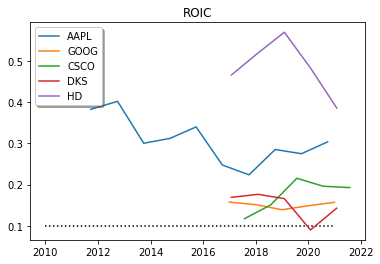

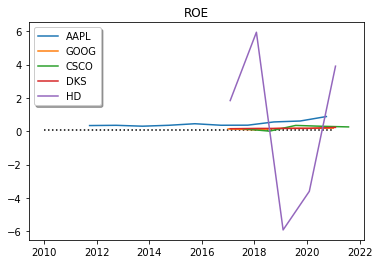

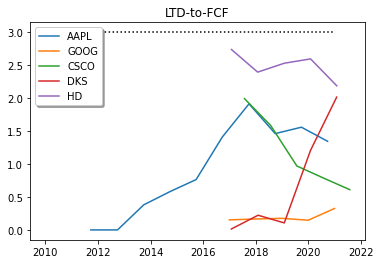

In [14]:
fig = []
ax = []

for column in mgt_columns:
  idx = mgt_columns.index(column)
  fig.append(idx)
  ax.append(idx)
  fig[idx], ax[idx] = plt.subplots()
  for symbol in symbols:
    ax[idx].plot(df_mgt.loc[symbol][column],label=symbol)
  plt.hlines(mgt_col_limits[idx], xmin=datetime.datetime(2010,1,1), xmax=datetime.datetime(2020,12,31), linestyle = 'dotted',colors='k')
  legend = ax[idx].legend(loc='best', shadow=True)
  plt.title(column)
plt.show()

In [15]:
def rolling_10(df):
  return df.rolling(window=10,min_periods=1).mean()

In [16]:
REVENUE = 'revenue'
CHG_FIX_ASSETS_INT = 'investmentsInPropertyPlantAndEquipment'
NET_CASH_OPS = 'netCashProvidedByOperatingActivities'
SHARES_DILUTED = 'weightedAverageShsOutDil'
FCF = 'freeCashFlow'

In [25]:
computed_columns = ['Sales','Sales_1y_change','PPE', 'PPE_1y_change','Cash_Ops','Shares_Diluted','PPE/Sales','PPE/Sales_10y_mean','Growth_Capex','Maint_Capex','Owner_Earnings','Owner_Earnings_per_share','10Cap'
                    ,'FCF', 'FCF_per_share','Windage_Growth_Rate','Payback_Time'
                    ,'Default_PE','PE','PE_10y_mean','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']
target_ROR = 0.15
df_computed = pd.DataFrame(index=df_income.index,columns=computed_columns)

# for 10 Cap calculation
df_computed['Sales'] = df_income[REVENUE]
df_computed['Sales_1y_change']= df_computed.groupby('symbol')['Sales'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True)
df_computed['PPE'] = -df_cashflow[CHG_FIX_ASSETS_INT]
df_computed['PPE_1y_change'] = df_computed.groupby('symbol')['PPE'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).reset_index(0,drop=True)
df_computed['Cash_Ops'] = df_cashflow[NET_CASH_OPS]
df_computed['Shares_Diluted'] = df_income[SHARES_DILUTED]
df_computed['PPE/Sales'] = df_computed['PPE']/df_computed['Sales']
df_computed['PPE/Sales_10y_mean'] = df_computed.groupby('symbol')['PPE/Sales'].rolling(10,min_periods=1).mean().reset_index(0,drop=True)#df.apply(df=df_computed['PPE/Sales'],func=rolling10)#df_computed['PPE/Sales'].rolling(window=10,min_periods=1).mean()
# for symbol in symbols:
# # #  df_computed.loc[ticker,'PPE/Sales_10y_mean'] = df_computed.loc[ticker]['PPE/Sales'].rolling(window=10,min_periods=1).mean()#df_computed.loc[ticker][-10:]['PPE/Sales'].mean()
#   df_computed.loc[symbol,'Windage_Growth_Rate'] = df_moat_perShare.loc[symbol,10]['EV+Div']
df_computed['Windage_Growth_Rate'] = df_moat_rolling5_pct_chg['Windage_Growth_Rate']
df_computed['Growth_Capex'] = df_computed['Sales_1y_change'] * df_computed['PPE/Sales_10y_mean']
df_computed['Maint_Capex'] = df_computed['PPE'] - df_computed['Growth_Capex']
df_computed['Owner_Earnings'] = df_computed['Cash_Ops'] - df_computed['Maint_Capex']
df_computed['Owner_Earnings_per_share'] = df_computed['Owner_Earnings']/df_computed['Shares_Diluted']
df_computed['10Cap']=10*df_computed['Owner_Earnings_per_share']

# # for payback time calculation
df_computed['FCF'] = df_cashflow[FCF]
df_computed['FCF_per_share'] = df_computed['FCF']/df_computed['Shares_Diluted']
df_computed['Payback_Time']=df_computed['FCF_per_share']*((1+df_computed['Windage_Growth_Rate'])**8)

# # for MOS calculation
# df_computed['Default_PE']=2*df_computed['Windage_Growth_Rate']*100
# df_computed['PE']=df_derived_shareprices[PE_TTM]
# df_computed['PE_10y_mean']=sf.apply(df=df_computed['PE'],func=rolling_40)
# df_computed['PE_10y_est'] = df_computed[['Default_PE','PE_10y_mean']].min(axis=1)
# df_computed['EPS'] = df_derived['Earnings Per Share, Basic']
# df_computed['EPS_10y_est'] = df_computed['EPS']*((1+df_computed['Windage_Growth_Rate'])**10)
# df_computed['Price_10y_est'] = df_computed['EPS_10y_est']*df_computed['PE_10y_est']
# df_computed['Sticker_Price'] = df_computed['Price_10y_est']/((1+target_ROR)**10)
# df_computed['MOS50'] = df_computed['Sticker_Price']*0.5
# df_computed['MOS30'] = df_computed['Sticker_Price']*0.7

# df_computed[['Default_PE','PE','PE_10y_mean','PE_10y_est','EPS','EPS_10y_est','Price_10y_est','Sticker_Price','MOS30','MOS50']]
df_computed[['PPE','Growth_Capex','Maint_Capex','Windage_Growth_Rate','Payback_Time']]

PPE  Growth_Capex   Maint_Capex  \
symbol date                                                   
AAPL   2011-09-24  4.260000e+09           NaN           NaN   
       2012-09-29  8.295000e+09  2.228461e+09  6.066539e+09   
       2013-09-28  8.165000e+09  6.727072e+08  7.492293e+09   
       2014-09-27  9.571000e+09  5.719272e+08  8.999073e+09   
       2015-09-26  1.124700e+10  2.450370e+09  8.796630e+09   
       2016-09-24  1.273400e+10 -9.027823e+08  1.363678e+10   
       2017-09-30  1.245100e+10  6.874756e+08  1.176352e+10   
       2018-09-29  1.331300e+10  1.836699e+09  1.147630e+10   
       2019-09-28  1.049500e+10 -2.677019e+08  1.076270e+10   
       2020-09-26  7.309000e+09  6.755566e+08  6.633443e+09   
CSCO   2017-07-29  9.640000e+08           NaN           NaN   
       2018-07-28  8.340000e+08  2.450441e+07  8.094956e+08   
       2019-07-27  9.090000e+08  4.676176e+07  8.622382e+08   
       2020-07-25  7.700000e+08 -4.563009e+07  8.156301e+08   
       2021-07-31  6.920000e+08  8.686613e+06  6.833134e+08   
DKS    2017-01-28  4.219200e+08           NaN           NaN   
       2018-02-03  4.743470e+08  3.625802e+07  4.380890e+08   
       2019-02-02  1.982190e+08 -6.770273e+06  2.049893e+08   
       2020-02-01  2.174610e+08  1.231739e+07  2.051436e+08   
       2021-01-30 -0.000000e+00  2.613537e+07 -2.613537e+07   
GOOG   2016-12-31  1.021200e+10           NaN           NaN   
       2017-12-31  1.318400e+10  2.388193e+09  1.079581e+10   
       2018-12-31  2.513900e+10  3.598559e+09  2.154044e+10   
       2019-12-31  2.354800e+10  3.513335e+09  2.003466e+10   
       2020-12-31  2.228100e+10  2.824969e+09  1.945603e+10   
HD     2017-01-29  1.621000e+09           NaN           NaN   
       2018-01-28  1.897000e+09  1.133609e+08  1.783639e+09   
       2019-02-03  2.442000e+09  1.423425e+08  2.299657e+09   
       2020-02-02  2.678000e+09  4.185576e+07  2.636144e+09   
       2021-01-31 -0.000000e+00  3.624187e+08 -3.624187e+08   

                   Windage_Growth_Rate  Payback_Time  
symbol date                                           
AAPL   2011-09-24                  NaN           NaN  
       2012-09-29             0.464506     33.139319  
       2013-09-28             0.245712      9.912021  
       2014-09-27             0.137759      5.721421  
       2015-09-26             0.254588     18.482399  
       2016-09-24             0.137759      6.827918  
       2017-09-30             0.101230      5.230634  
       2018-09-29             0.137759      9.002529  
       2019-09-28             0.101230      6.850127  
       2020-09-26             0.053986      6.374265  
CSCO   2017-07-29                  NaN           NaN  
       2018-07-28            -0.172952      0.575482  
       2019-07-27             0.126202      8.671712  
       2020-07-25             0.017931      3.982817  
       2021-07-31             0.000102      3.487734  
DKS    2017-01-28                  NaN           NaN  
       2018-02-03             0.088972      4.955972  
       2019-02-02             0.076378      9.385548  
       2020-02-01             0.061986      3.375999  
       2021-01-30             0.076378     25.844258  
GOOG   2016-12-31                  NaN           NaN  
       2017-12-31             0.055694     52.422052  
       2018-12-31             0.192565    132.821780  
       2019-12-31             0.152910    139.600740  
       2020-12-31             0.174183    227.378862  
HD     2017-01-29                  NaN           NaN  
       2018-01-28             0.121061     21.353225  
       2019-02-03             0.156709     29.709024  
       2020-02-02             0.126477     26.590674  
       2021-01-31             0.124080     38.722819

In [ ]:

print(f"Multiple Company Quotes: {fmpsdk.quote(apikey=apikey, symbol=symbols)=}")
print(f"Key Executives: {fmpsdk.key_executives(apikey=apikey, symbol=symbol)=}")
print(f"Search: {fmpsdk.search(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
print(f"Ticker Search: {fmpsdk.search_ticker(apikey=apikey, query=query, exchange=exchange, limit=limit)=}")
fmpsdk.financial_statement(apikey=apikey, symbol=symbol)
print(f"Annual Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement: {fmpsdk.income_statement(apikey=apikey, symbol=symbol, period='quarter')=}")
fmpsdk.income_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement: {fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, )=}")
print(f"Quarterly Cash Flow Statement: {fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement(apikey=apikey, symbol=symbol, download=download)
print(f"Financial Statement Symbols List: {fmpsdk.financial_statement_symbol_lists(apikey=apikey)=}")
print(f"Income Statement Growth: {fmpsdk.income_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Balance Sheet Statement Growth: {fmpsdk.balance_sheet_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Cash Flow Statement Growth: {fmpsdk.cash_flow_statement_growth(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Annual Income Statement as Reported : {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Income Statement as Reported: {fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.income_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Balance Sheet Statement as Reported : {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Balance Sheet Statement as Reported: {fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.balance_sheet_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Cash Flow Statement as Reported : {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Cash Flow Statement as Reported: {fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
fmpsdk.cash_flow_statement_as_reported(apikey=apikey, symbol=symbol, download=download)
print(f"Annual Full Financial Statement as Reported : {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Full Financial Statement as Reported: {fmpsdk.financial_statement_full_as_reported(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Financial Ratios (TTM): {fmpsdk.financial_ratios_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Ratios: {fmpsdk.financial_ratios(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Enterprise Values: {fmpsdk.enterprise_values(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Key Metrics (TTM): {fmpsdk.key_metrics_ttm(apikey=apikey, symbol=symbol)=}")
print(f"Annual Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Key Metrics: {fmpsdk.key_metrics(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Annual Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Financial Growth: {fmpsdk.financial_growth(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Company Rating: {fmpsdk.rating(apikey=apikey, symbol=symbol)=}")
print(f"Historical Company Rating: {fmpsdk.historical_rating(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Discounted Cash Flow: {fmpsdk.discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Annual Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Quarterly Historical Discounted Cash Flow: {fmpsdk.historical_discounted_cash_flow(apikey=apikey, symbol=symbol, period=period)=}")
print(f"Daily Historical Discounted Cash Flow: {fmpsdk.historical_daily_discounted_cash_flow(apikey=apikey, symbol=symbol)=}")
print(f"Market Capitalization: {fmpsdk.market_capitalization(apikey=apikey, symbol=symbol)=}")
print(f"Historical Market Capitalization: {fmpsdk.historical_market_capitalization(apikey=apikey, symbol=symbol, limit=limit)=}")
print(f"Symbols List: {fmpsdk.symbols_list(apikey=apikey)=}")
print(f"Stock Screener (Sector Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Industry Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, sector=sector, industry=industry, exchange=exchange, dividend_more_than=dividend_more_than, limit=limit)=}")
print(f"Stock Screener (Multiple Exchanges Example): {fmpsdk.stock_screener(apikey=apikey, market_cap_more_than=market_cap_more_than, beta_more_than=beta_more_than, volume_more_than=volume_more_than, exchange=exchanges)=}")
print(f"Delisted Companies: {fmpsdk.delisted_companies(apikey=apikey, limit=limit)=}")
print(f"Stock News (Single): {fmpsdk.stock_news(apikey=apikey, tickers=symbol)=}")
print(f"Stock News (Multiple): {fmpsdk.stock_news(apikey=apikey, tickers=symbols)=}")
print(f"Stock News (Latest): {fmpsdk.stock_news(apikey=apikey, limit=limit)=}")
print(f"Earnings Surprises: {fmpsdk.earnings_surprises(apikey=apikey, symbol=symbol)=}")
print(f"SEC Filings: {fmpsdk.sec_filings(apikey=apikey, symbol=symbol, filing_type=filing_type)=}")
print(f"Press Releases: {fmpsdk.press_releases(apikey=apikey, symbol=symbol)=}")
